# Modeling and Simulation in Python

HIV Model
Maalvika Bhat

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)

In [12]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

Making System

In [13]:
init = State(R = 200, 
             L = 0, 
             E = 0, 
             V = 100)
system = System(init = init, 
                gamma = 1.36, 
                tau = .2, 
                mu = .00136, 
                beta = .00027, 
                delta = .33, 
                alpha = .036, 
                rho = .1, 
                sigma = 2, 
                pi = 100, 
                t_0 = 0, 
                t_end = 120, 
                dt = 0.2)

,values
init,R 200 L 0 E 0 V 100 dtype: int64
gamma,1.36
tau,0.2
mu,0.00136
beta,0.00027
delta,0.33
alpha,0.036
rho,0.1
sigma,2
pi,100


In [14]:
def update_func(init, system):
    r, l, e, v = init
    
    deltaR = ((system.gamma * system.tau) - (system.mu * r) - (system.beta * r * v))*system.dt
    deltaL = ((system.rho * system.beta * r * v) - (system.mu * l) - (system.alpha * l))*system.dt
    deltaE = (((1 - system.rho) * system.beta * r * v) + (system.alpha * l) - (system.delta * e))*system.dt
    deltaV = ((system.pi * e) - (system.sigma * v))*system.dt
    
    r += deltaR 
    l += deltaL
    e += deltaE
    v += deltaV
    
    return State(R = r, L = l, E = e, V = v)

In [15]:
def slope_func(init, t0, system):
    r, l, e, v = init
    
    deltaR = ((system.gamma * system.tau) - (system.mu * r) - (system.beta * r * v))
    deltaL = ((system.rho * system.beta * r * v) - (system.mu * l) - (system.alpha * l))
    deltaE = (((1 - system.rho) * system.beta * r * v) + (system.alpha * l) - (system.delta * e))
    deltaV = ((system.pi * e) - (system.sigma * v))
    
    return deltaR, deltaL, deltaE, deltaV

In [16]:
def runSimulation(system, state, update_func):#takes in system state and update_func
    frame = TimeFrame(columns = state.index)
    frame.row[system.t_0] = state #assigns first time step to initial state
    
    for i in linrange(system.t_0, system.t_end):
        frame.row[i+1] = update_func(frame.row[i], system) #updates the state and takes the last state into update_func
    print(frame)
    return frame #returns the timeframe

In [17]:
def plotData(R, L, E, V, ode): #plots R, L, E
    plot(R, label = "R")
    plot(L, label = "L")
    plot(E, label = "E")
    if ode: #because of dt time scale is different when using ode vs not using ode
        decorate(xlabel='Time (Days)',
                 ylabel='Lymphocytes')
    else:
        decorate(xlabel='Time (0.2 Days)',
                 ylabel='Lymphocytes')

In [18]:
def plotVirons(virons): #plots virons
    plot(virons, label = "V")
    decorate(xlabel='Time (0.2 Days)',
             ylabel='Virons')

           R         L        E        V
0        200         0        0      100
1     198.92     0.108    0.972       60
2    198.276  0.171643  1.48868    55.44
3    197.683   0.22972  1.92589  63.0375
4     197.01  0.295295  2.40606  76.3403
5    196.199  0.374304  2.98032  93.9254
6    195.205  0.471018  3.68192  115.962
7    193.984  0.589735  4.54243  143.215
8    192.485  0.735349  5.59706  176.778
9     190.65  0.913601  6.88667  218.008
10   188.408   1.13122  8.45869  268.538
11   185.679   1.39597  10.3675  330.297
12   182.371   1.71672  12.6739  405.527
13   178.382   2.10326   15.444  496.794
14   173.603   2.56609  18.7468  606.957
15    167.92   3.11591  22.6489   739.11
16   161.227   3.76283  27.2083  896.444
17   153.433   4.51518  32.4639  1082.03
18    144.48   5.37794  38.4223   1298.5
19   134.365   6.35084  45.0428  1547.54
20   123.154   7.42623  52.2214  1829.38
21   111.009   8.58734  59.7776  2142.06
22   98.1925   9.80723  67.4506  2480.79
23   85.0661   1

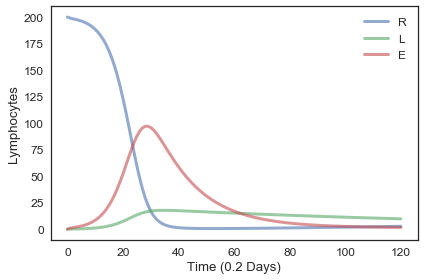

In [19]:
system.set(t_end = 120)
frame = runSimulation(system, init, update_func)
plotData(frame.R, frame.L, frame.E, frame.V, False)

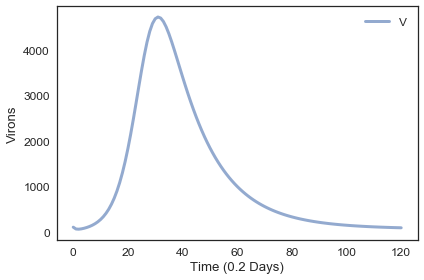

In [20]:
plotVirons(frame.V)

                    R          L          E            V
0.000000   200.000000   0.000000   0.000000   100.000000
0.000289   199.998439   0.000156   0.001405    99.942195
0.003181   199.982876   0.001712   0.015403    99.368209
0.032102   199.832031   0.016787   0.150379    94.020487
0.227930   198.973278   0.102229   0.888903    72.699460
0.495024   197.979094   0.200190   1.671985    70.010923
0.795024   196.747048   0.320606   2.575559    87.068123
1.095024   195.129031   0.478141   3.728275   119.547537
1.395024   192.893167   0.695459   5.306026   168.323296
1.695024   189.779938   0.997736   7.492467   237.862353
1.995024   185.471401   1.415689  10.504521   335.146842
2.295024   179.583682   1.986265  14.595605   469.367873
2.595024   171.685406   2.750733  20.036255   651.561599
2.895024   161.355425   3.748899  27.062735   893.596488
3.195024   148.294260   5.008025  35.784274  1205.954767
3.495024   132.487210   6.526741  46.054712  1593.942918
3.795024   114.375186   8.25836

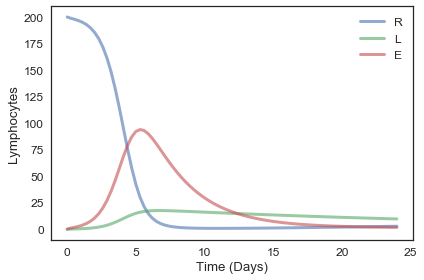

In [21]:
system.set(t_end = 120/5)#keeps the ode solver with the same time length because dt is 0.2 days in the graph above
results, details = run_ode_solver(system, slope_func, max_step = .3)
print(results)
plotData(results.R, results.L, results.E, results.V, True)